# Exploratory Data Analysis Notebook

#### This notebook will be used to load the datasets for this project as well as performing EDA. I tried creating a baseline model in my first eda notebook by processing the data with simple imputer, missing indicator, and one hot encoder. Nothing was seeming to work for the model due to the variety of features in the dataset. I will begin performing some feature engineering here.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
train_data = pd.read_csv('../data/train_data.csv')
train_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
train_target = pd.read_csv('../data/train_targets.csv')
train_target.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
test = pd.read_csv('../data/test_set_values.csv')
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


### Let's see how many records there are in each dataset

In [6]:
train_data.shape

(59400, 40)

In [7]:
train_target.shape

(59400, 2)

In [8]:
test.shape

(14850, 40)

## Checking for any missing values in the datasets

In [9]:
train_data.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [10]:
train_target.isna().sum()

id              0
status_group    0
dtype: int64

In [11]:
test.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [12]:
train_data['id'].duplicated().sum()

0

In [13]:
train_target['id'].duplicated().sum()

0

#### I am going to merge the train_data and the train_target dataframes together for my training set.

In [14]:
train = train_data.merge(train_target, on='id', how='inner')

In [15]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## Copy dataframes:
#### Before I go any further in manipulating the data I am going to create a copy of each dataframe incase I need to revert back from a change I made.

In [16]:
train_copy = train.copy()

In [17]:
test_copy = test.copy()

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [19]:
train['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

#### I need to change the target variable (status group) into a numerical column. Then I will begin to go through the features one by one 

In [20]:
status_group_numeric = {'functional': 2,
                        'functional needs repair': 1,
                        'non functional': 0}
train['status'] = train.status_group.replace(status_group_numeric)

In [21]:
train['status'].value_counts()

2    32259
0    22824
1     4317
Name: status, dtype: int64

In [22]:
train['status'].value_counts(normalize=True)

2    0.543081
0    0.384242
1    0.072677
Name: status, dtype: float64

#### Here we can see that:
- Approximately 54 percent of the wells are functional
- Approximately 38.5 percent of the wells are non functional
- Approximately 7.5 percent of the wells are functional but in need of repair

#### It looks like there are 7 columns containing null values, I need to go through each column and see if I can categorize them or if I am able to drop them.

In [23]:
train.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [24]:
train.funder.nunique()

1897

In [25]:
train['funder'].value_counts()[:20]

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

#### The funder column shows who funded the well. There are 1,897 different outcomes but it looks like only the top 7 fields have values that occur more over a thousand times. I'm going to divide this column into 7 different categorites with these, the rest of the fields will be categorized as 'other'.

In [26]:
train['funder'].value_counts()[:10]

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Name: funder, dtype: int64

In [27]:
def categorize_funder(train):
    '''This function will go through every row in
    the dataframe column funder and if the value
    is any of the top 7 fields, will return those
    values. If the value does not equal any of these
    top 7 fields, it will return other.'''
    if train['funder'] == 'Government Of Tanzania':
        return 'govt'
    elif train['funder'] == 'Danida':
        return 'danida'
    elif train['funder'] == 'Hesawa':
        return 'hesawa'
    elif train['funder'] == 'Rwssp':
        return 'rwssp'
    elif train['funder'] == 'World Bank':
        return 'world_bank'
    elif train['funder'] == 'Kkkt':
        return 'kkkt'
    elif train['funder'] == 'World Vision':
        return 'world_vision'
    else:
        return 'other'

In [28]:
train['funder'] = train.apply(lambda x: categorize_funder(x), axis=1)

In [29]:
train['funder'].value_counts()

other           39744
govt             9084
danida           3114
hesawa           2202
rwssp            1374
world_bank       1349
kkkt             1287
world_vision     1246
Name: funder, dtype: int64

#### Now that we have the funder field categorized, we can move on to the next field containing null values, installer.

In [30]:
train['installer'].value_counts()[:30]

DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
World vision            408
LGA                     408
WEDECO                  397
TASAF                   396
District council        392
Gover                   383
AMREF                   329
TWESA                   316
WU                      301
Dmdd                    287
ACRA                    278
World Vision            270
SEMA                    249
DW                      246
OXFAM                   234
Name: installer, dtype: int64

### Since I only kept the top 7 fields for the funder field I will do the same for the installer field. 

In [31]:
train['installer'].value_counts()[:7]

DWE           17402
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
KKKT            898
Hesawa          840
Name: installer, dtype: int64

#### I am going to categorize the installer field into 7 categories, if the values are any of the top 7 installers, those installers will be returned, if not, then the values will be categorized into 'other'.

In [32]:
def categorize_installer(train):
    '''This function will go through
    every row in the installer column
    and if the value is equal to any of
    the top 7, will return those values.
    If not, will return other.'''
    if train['installer'] == 'DWE':
        return 'dwe'
    elif train['installer'] == 'Government':
        return 'govt'
    elif train['installer'] == 'RWE':
        return 'rwe'
    elif train['installer'] == 'Commu':
        return 'commu'
    elif train['installer'] == 'DANIDA':
        return 'danida'
    elif train['installer'] == 'KKKT':
        return 'kkkt'
    elif train['installer'] == 'Hesawa':
        return 'hesawa'
    else:
        return 'other'

In [33]:
train['installer'] = train.apply(lambda x: categorize_installer(x), axis=1)

In [34]:
train['installer'].value_counts()

other     35119
dwe       17402
govt       1825
rwe        1206
commu      1060
danida     1050
kkkt        898
hesawa      840
Name: installer, dtype: int64

#### I also need to categorize these columns in the test dataset as well.

In [35]:
test['funder'] = test.apply(lambda x: categorize_funder(x), axis=1)

In [36]:
test['funder'].value_counts()

other           9929
govt            2215
danida           793
hesawa           580
world_bank       352
kkkt             336
rwssp            329
world_vision     316
Name: funder, dtype: int64

In [37]:
test['installer'] = test.apply(lambda x: categorize_installer(x), axis=1)

In [38]:
test['installer'].value_counts()

other     8758
dwe       4349
govt       457
rwe        292
commu      287
danida     255
hesawa     230
kkkt       222
Name: installer, dtype: int64

In [39]:
train.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

#### Now on to subvillage

In [40]:
train['subvillage'].value_counts()

Madukani           508
Shuleni            506
Majengo            502
Kati               373
Mtakuja            262
                  ... 
Nabuhima Chuoni      1
Kisangweni           1
Namasimba            1
Mlima Wa Tanga       1
Undomo Cheyo         1
Name: subvillage, Length: 19287, dtype: int64

#### The subvillage field won't be as easy to categorize from the looks of it. The funder and installer fields both had values above 1000 for the dataset. The subvillage field shows 3 values that occur over 500. I don't think we can assume that these 3 values can represent this field of the dataset, I may leave this field out for now.

In [41]:
train['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [42]:
sum(train['subvillage'] == 'Iringa')

11

In [43]:
sum(train['subvillage'] == 'Shinyanga')

8

In [44]:
sum(train['subvillage'] == 'Mbeya')

9

In [45]:
sum(train['subvillage'] == 'Kilimanjaro')

8

In [46]:
sum(train['subvillage'] == 'Morogoro')

15

In [47]:
sum(train['subvillage'] == 'Arusha')

5

In [48]:
sum(train['subvillage'] == 'Kagera')

30

In [49]:
sum(train['subvillage'] == 'Mwanza')

10

In [50]:
sum(train['subvillage'] == 'Kigoma')

12

In [51]:
sum(train['subvillage'] == 'Ruvuma')

9

In [52]:
sum(train['subvillage'] == 'Pwani')

5

In [53]:
sum(train['subvillage'] == 'Tanga')

5

In [54]:
sum(train['subvillage'] == 'Dodoma')

52

In [55]:
sum(train['subvillage'] == 'Singida')

5

In [56]:
sum(train['subvillage'] == 'Mara')

3

In [57]:
sum(train['subvillage'] == 'Tabora')

11

In [58]:
sum(train['subvillage'] == 'Rukwa')

0

In [59]:
sum(train['subvillage'] == 'Mtwara')

6

In [60]:
sum(train['subvillage'] == 'Manyara')

9

In [61]:
sum(train['subvillage'] == 'Lindi')

0

In [62]:
sum(train['subvillage'] == 'Dar es Salaam')

0

#### It looks like I could categorize the subvillage field by the regions in the region field but the regions in this field only represent about 213 of the subvillages when there are 19,287 unique values in the subvillage field. I am going to drop subvillage from the datasets.

### Removing subvillage from train dataframe

In [63]:
train = train.drop(columns=['subvillage'], axis=1)

### Removing subvillage from test dataframe

In [64]:
test = test.drop(columns=['subvillage'], axis=1)

In [65]:
train.isnull().sum() 

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

## Now for public meeting

In [66]:
train['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [67]:
train['public_meeting'].value_counts(normalize=True)

True     0.909838
False    0.090162
Name: public_meeting, dtype: float64

#### It looks like 91 percent of the values in this field are True and only 9 percent False. We have 3,334 null values in this column, I would like to fill 9 percent of the na values with false and 91 percent with True

## Public_meeting to numeric

In [68]:
train['public_meeting'].fillna(False, limit=300, inplace=True)

In [69]:
train['public_meeting'].fillna(True, inplace=True)

In [70]:
train['public_meeting'].isna().sum()

0

In [71]:
def public(row):
    if row['public_meeting'] == True:
        return 1
    else:
        return 0
train['public_meeting'] = train.apply(lambda x: public(x), axis=1)

In [72]:
train['public_meeting'].value_counts()

1    54045
0     5355
Name: public_meeting, dtype: int64

#### I need to do the same for the test dataset but change the limit since this dataset is smaller. Nine percent of the test public meeting na values is around 74, so 74 na values will be filled with false and the rest true.

In [73]:
test.shape

(14850, 39)

In [74]:
test['public_meeting'].isna().sum()

821

In [75]:
sum(test['public_meeting']== False)

1291

In [76]:
sum(test['public_meeting']== True)

12738

In [77]:
test['public_meeting'].fillna(False, limit=74, inplace=True)

In [78]:
test['public_meeting'].fillna(True, inplace=True)

In [79]:
test['public_meeting'].value_counts()

True     13485
False     1365
Name: public_meeting, dtype: int64

In [80]:
train['public_meeting'].value_counts()

1    54045
0     5355
Name: public_meeting, dtype: int64

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null int64
recorded_by              59400 non-null object
sc

In [82]:
test.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                      0
gps_height                  0
installer                   0
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting              0
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_g

In [83]:
train.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

## Now for scheme_management
#### The Scheme management field shows who operated the waterpoint. We have 3877 na values in this field.

In [84]:
train['scheme_management'].value_counts()[:50]

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

#### These values look like they can be reduced down to fewer categories. To keep things consistent, I am going to use the top 7 values to categorize this field. If the values are any of the top 7, those values will be returned. If not, then the values will be categorized as 'other'.

In [85]:
def categorize_scheme(row):
    '''This function will go through each
    row in the scheme management column
    and if the value is equal to any of the 
    top 7, will return those values. If not,
    will categorize the value as other.'''
    if row['scheme_management'] == 'VWC':
        return 'vwc'
    elif row['scheme_management'] == 'WUG':
        return 'wug'
    elif row['scheme_management'] == 'Water authority':
        return 'water_authority'
    elif row['scheme_management'] == 'WUA':
        return 'wua'
    elif row['scheme_management'] == 'Water Board':
        return 'water_board'
    elif row['scheme_management'] == 'Parastatal':
        return 'parastatal'
    elif row['scheme_management'] == 'Private operator':
        return 'private_operator'
    else:
        return 'other'

In [86]:
train['scheme_management'] = train.apply(lambda x: categorize_scheme(x), axis=1)
test['scheme_management'] = test.apply(lambda x: categorize_scheme(x), axis=1)

In [87]:
train['scheme_management'].value_counts()

vwc                 36793
other                5874
wug                  5206
water_authority      3153
wua                  2883
water_board          2748
parastatal           1680
private_operator     1063
Name: scheme_management, dtype: int64

In [88]:
test['scheme_management'].value_counts()

vwc                 9124
other               1525
wug                 1290
water_authority      822
water_board          714
wua                  668
parastatal           444
private_operator     263
Name: scheme_management, dtype: int64

#### This seems like a good point to make another copy of the dataframes

In [89]:
train_copy2 = train.copy()
test_copy2 = test.copy()

In [90]:
train.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management            0
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

## Now for scheme name

In [91]:
train['scheme_name'].value_counts()[:30]

K                                        682
None                                     644
Borehole                                 546
Chalinze wate                            405
M                                        400
DANIDA                                   379
Government                               320
Ngana water supplied scheme              270
wanging'ombe water supply s              261
wanging'ombe supply scheme               234
I                                        229
Bagamoyo wate                            229
Uroki-Bomang'ombe water sup              209
N                                        204
Kirua kahe gravity water supply trust    193
Machumba estate pipe line                185
Makwale water supplied sche              166
Kijiji                                   161
S                                        154
Losaa-Kia water supply                   152
mtwango water supply scheme              152
Handeni Trunk Main(H                     152
Mkongoro T

#### I'm running into the same issue with this field as the subvillage field. There isn't any a range of values that can represent the dataset here. This column also has a significant amount of na values at 28,166. I am going to drop this field for now.

In [92]:
train = train.drop(columns=['scheme_name'], axis=1)
test = test.drop(columns=['scheme_name'], axis=1)

In [93]:
train.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                      0
gps_height                  0
installer                   0
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting              0
recorded_by                 0
scheme_management           0
permit                   3056
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source    

## Last but not least, permit
#### This field has 3,056 na values

In [94]:
train['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [95]:
train['permit'].value_counts(normalize=True)

True     0.68955
False    0.31045
Name: permit, dtype: float64

#### It looks like about 69 percent of the values are true and 31 percent are false. I am going to fill 69 percent of the na values with true and the other 31 percent with false

In [96]:
train['permit'].fillna(False, limit=947, inplace=True)
train['permit'].fillna(True, inplace=True)

In [97]:
train.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
w

In [98]:
test['permit'].isna().sum()

737

In [99]:
test['permit'].value_counts(normalize=True)

True     0.691136
False    0.308864
Name: permit, dtype: float64

In [100]:
test['permit'].fillna(False, limit=221, inplace=True)
test['permit'].fillna(True, inplace=True)

In [101]:
test['permit'].value_counts()

True     10270
False     4580
Name: permit, dtype: int64

In [102]:
test.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
w

In [103]:
pivot_train = pd.pivot_table(train, index=['status_group'], 
                            values='status',
                            aggfunc='count')
pivot_train

,status
status_group,
functional,32259
functional needs repair,4317
non functional,22824


In [104]:
train.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,permit,construction_year,status
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,0.003472,0.001885,-0.002082,-0.004049
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.017166,0.019729,0.067915,0.053702
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.036064,0.078338,0.658727,0.114029
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.025846,0.097883,0.396732,-0.004366
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,0.002990,0.069792,-0.245278,0.014547
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.009022,0.009354,0.026056,0.005021
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,-0.018655,-0.028658,0.031724,-0.108640
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.013712,-0.070338,0.048315,-0.065687
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.006338,-0.035899,0.260910,0.017759
public_meeting,0.003472,0.017166,0.036064,0.025846,0.002990,0.009022,-0.018655,0.013712,0.006338,1.000000,0.123708,0.025222,0.068857


In [105]:
test.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,permit,construction_year
id,1.000000,-0.016012,0.002711,-0.003331,0.009632,-0.016040,0.002601,-0.000655,-0.016068,-0.002086,-0.007042,-0.004591
amount_tsh,-0.016012,1.000000,0.096230,0.027709,-0.072210,0.022978,-0.028887,-0.027391,0.028657,0.017713,0.030772,0.086236
gps_height,0.002711,0.096230,1.000000,0.148722,-0.045028,0.013331,-0.177832,-0.169586,0.131994,0.031706,0.083568,0.656781
longitude,-0.003331,0.027709,0.148722,1.000000,-0.430001,0.030979,0.024354,0.148962,0.090862,0.033532,0.105167,0.397361
latitude,0.009632,-0.072210,-0.045028,-0.430001,1.000000,0.002048,-0.203080,-0.196176,-0.024123,0.003822,0.057119,-0.256610
num_private,-0.016040,0.022978,0.013331,0.030979,0.002048,1.000000,-0.028188,-0.010341,0.001517,0.014514,0.023495,0.036118
region_code,0.002601,-0.028887,-0.177832,0.024354,-0.203080,-0.028188,1.000000,0.687910,0.097118,-0.025330,-0.019950,0.029993
district_code,-0.000655,-0.027391,-0.169586,0.148962,-0.196176,-0.010341,0.687910,1.000000,0.066425,0.003519,-0.067468,0.046214
population,-0.016068,0.028657,0.131994,0.090862,-0.024123,0.001517,0.097118,0.066425,1.000000,-0.011571,-0.037365,0.272421
public_meeting,-0.002086,0.017713,0.031706,0.033532,0.003822,0.014514,-0.025330,0.003519,-0.011571,1.000000,0.123652,0.016526


In [106]:
train.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null int64
recorded_by              59400 non-null object
sc

#### It seems that a majority of the values are not correlated with each other indicating little multicollinearity. Construction year does show a correlation with gps height and longitude but I will keep these for now as they may be needed.

In [107]:
train['funder'].nunique()

8

In [108]:
train['funder'].value_counts()

other           39744
govt             9084
danida           3114
hesawa           2202
rwssp            1374
world_bank       1349
kkkt             1287
world_vision     1246
Name: funder, dtype: int64

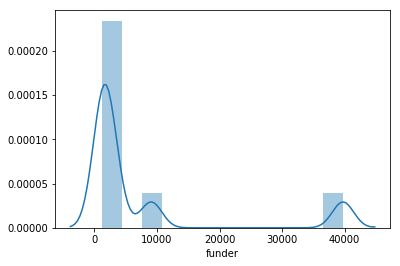

In [109]:
sns.distplot(train['funder'].value_counts())

In [110]:
train['longitude'].nunique()

57516

In [111]:
train['longitude'].value_counts()

0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64

In [112]:
train['latitude'].nunique()

57517

In [113]:
train['latitude'].value_counts()

-2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64

#### The wpt name field only tels us the name of the waterpoint. It won't be neccessary for the model so I'm going to remove it.

In [114]:
train['wpt_name'].nunique()

37400

In [115]:
train['wpt_name'].value_counts()

none                      3563
Shuleni                   1748
Zahanati                   830
Msikitini                  535
Kanisani                   323
                          ... 
Mambo                        1
Kwa Lukania Mwaigomole       1
Kwa Willi Urio               1
Kwakabage                    1
Kwa Adam Abibu               1
Name: wpt_name, Length: 37400, dtype: int64

In [116]:
train = train.drop(columns=['wpt_name'], axis=1)
test = test.drop(columns=['wpt_name'], axis=1)

#### I'm not sure what the num private field represents, there wasn't any information on it in the documentation. I may end up removing this field later on.

In [117]:
train['num_private'].nunique()

65

In [118]:
train['num_private'].value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [119]:
train['basin'].nunique()

9

In [120]:
train['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [121]:
train['region'].nunique()

21

In [122]:
train['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [123]:
train['region_code'].nunique()

27

In [124]:
train['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

#### From the four cells above we can see that the region and region code fields provide us with similar information except region code shows the numberical value for each region instead of the name. I am going to drop region for now.

In [125]:
train = train.drop(columns=['region'], axis=1)
test = test.drop(columns=['region'], axis=1)

In [126]:
train['district_code'].nunique()

20

In [127]:
train['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [128]:
train['lga'].nunique()

125

In [129]:
train['lga'].value_counts()[:30]

Njombe           2503
Arusha Rural     1252
Moshi Rural      1251
Bariadi          1177
Rungwe           1106
Kilosa           1094
Kasulu           1047
Mbozi            1034
Meru             1009
Bagamoyo          997
Singida Rural     995
Kilombero         959
Same              877
Kibondo           874
Kyela             859
Kahama            836
Kigoma Rural      824
Magu              824
Maswa             809
Karagwe           771
Mbinga            750
Iringa Rural      728
Serengeti         716
Namtumbo          694
Lushoto           694
Songea Rural      693
Mpanda            679
Mvomero           671
Ngara             669
Ulanga            665
Name: lga, dtype: int64

In [130]:
train['ward'].nunique()

2092

In [131]:
train['ward'].value_counts()[:30]

Igosi            307
Imalinyi         252
Siha Kati        232
Mdandu           231
Nduruma          217
Mishamo          203
Kitunda          203
Msindo           201
Chalinze         196
Maji ya Chai     190
Usuka            187
Ngarenanyuki     172
Chanika          171
Vikindu          162
Mtwango          153
Matola           145
Zinga/Ikerege    141
Wanging'ombe     139
Maramba          139
Itete            137
Magomeni         135
Kikatiti         134
Ifakara          134
Olkokola         133
Maposeni         130
Mvomero          129
Igongolo         129
Mlangali         125
Nkoma            122
Nkungulu         121
Name: ward, dtype: int64

In [132]:
train['population'].nunique()

1049

In [133]:
train['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [134]:
train['public_meeting'].nunique()

2

In [135]:
train['public_meeting'].value_counts()

1    54045
0     5355
Name: public_meeting, dtype: int64

### The recorded by field values are all the same, I'm going to remove them.

In [136]:
train['recorded_by'].nunique()

1

In [137]:
train = train.drop(columns=['recorded_by'], axis=1)
test = test.drop(columns=['recorded_by'], axis=1)

In [138]:
train['scheme_management'].nunique()

8

In [139]:
train['scheme_management'].value_counts()

vwc                 36793
other                5874
wug                  5206
water_authority      3153
wua                  2883
water_board          2748
parastatal           1680
private_operator     1063
Name: scheme_management, dtype: int64

In [140]:
train['permit'].nunique()

2

In [141]:
train_copy3 = train.copy()

In [142]:
train['permit'].value_counts()

True     40961
False    18439
Name: permit, dtype: int64

### Changing permit field to binary values

In [143]:
def permit(row):
    if row['permit'] == True:
        return 1
    else:
        return 0
train['permit'] = train.apply(lambda x: permit(x), axis=1)

In [144]:
test['permit'] = test.apply(lambda x: permit(x), axis=1)

In [145]:
train['permit'].value_counts()

1    40961
0    18439
Name: permit, dtype: int64

In [146]:
test['permit'].value_counts()

1    10270
0     4580
Name: permit, dtype: int64

#### It looks like the construction year field will be pretty hard for our model to categorize since we have 55 different construction years in the dataset. I am going to try binning these years into decades.

In [147]:
train['construction_year'].nunique()

55

In [148]:
train['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [149]:
def categorize_contruction(row):
    if row['construction_year'] < 1970:
        return '1960s'
    elif row['construction_year'] < 1980:
        return '1970s'
    elif row['construction_year'] < 1990:
        return '1980s'
    elif row['construction_year'] < 2000:
        return '1990s'
    elif row['construction_year'] < 2010:
        return '2000s'
    elif row['construction_year'] < 2020:
        return '2010s'

In [150]:
train['construction_year'] = train.apply(lambda x: categorize_contruction(x), axis=1)

In [151]:
train['construction_year'].value_counts()

1960s    21247
2000s    15330
1990s     7678
1980s     5578
2010s     5161
1970s     4406
Name: construction_year, dtype: int64

In [152]:
test['construction_year'] = test.apply(lambda x: categorize_contruction(x), axis=1)

In [153]:
test['construction_year'].value_counts()

1960s    5381
2000s    3833
1990s    1933
1980s    1361
2010s    1300
1970s    1042
Name: construction_year, dtype: int64

In [154]:
train['extraction_type'].nunique()

18

In [155]:
train['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [156]:
train['extraction_type_group'].nunique()

13

In [157]:
train['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [158]:
train['extraction_type_class'].nunique()

7

In [159]:
train['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

#### From the four cells above, we can see that the 3 different extraction type fields provide the same information. Extraction type class has 7 different categories representing the most frequent values from all 3 classes, this is the one I will keep.

In [160]:
train = train.drop(columns=['extraction_type', 'extraction_type_group'],
                  axis=1)

In [161]:
test = test.drop(columns=['extraction_type', 'extraction_type_group'],
                  axis=1)

In [162]:
train['management'].nunique()

12

In [163]:
train['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [164]:
train['management_group'].nunique()

5

In [165]:
train['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

#### From the four cells above we can see that the management and management_group fields also provide the same information. There are fewer categories in the management group field but this is due to the values from the management field being represented together. I am going to remove the management group field for now.

In [166]:
train = train.drop(columns=['management_group'], axis=1)
test = test.drop(columns=['management_group'], axis=1)

In [167]:
train['payment'].nunique()

7

In [168]:
train['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [169]:
train['payment_type'].nunique()

7

In [170]:
train['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

#### From the four cells above we can see that the payment and payment type fields also proved us with the same exact information. It will on be neccessary to keep one of them, I am going to drop payment_type for now.

In [171]:
train = train.drop(columns=['payment_type'], axis=1)
test = test.drop(columns=['payment_type'], axis=1)

In [172]:
train['water_quality'].nunique()

8

In [173]:
train['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [174]:
train['quality_group'].nunique()

6

In [175]:
train['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

#### We can see from the four cells above that the water_quality and quality_group fields also provide us with the same information, since quality group seems a bit more interpretable, I will drop water quality for now.

In [176]:
train = train.drop(columns=['water_quality'], axis=1)
test = test.drop(columns=['water_quality'], axis=1)

In [177]:
train['quantity'].nunique()

5

In [178]:
train['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [179]:
train['quantity_group'].nunique()

5

In [180]:
train['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

#### We can see from the four cells above that the quantity and quantity group fields also provide us with the same exact information, let's remove quantity group for now.

In [181]:
train = train.drop(columns=['quantity_group'], axis=1)
test = test.drop(columns=['quantity_group'], axis=1)

In [182]:
train['source'].nunique()

10

In [183]:
train['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [184]:
train['source_type'].nunique()

7

In [185]:
train['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

#### We can see from the four cells above that the source and soure type fields also provide us with similar information. The source field has a value, machine dbh, representing 11,075 waterpoints in the dataset. I will keep souce and drop source type for now.

In [186]:
train = train.drop(columns=['source_type'], axis=1)
test = test.drop(columns=['source_type'], axis=1)

In [187]:
train['source_class'].nunique()

3

In [188]:
train['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [189]:
train['waterpoint_type'].nunique()

7

In [190]:
train['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [191]:
train['waterpoint_type_group'].nunique()

6

In [192]:
train['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

#### We can see from the four cells above that the waterpoint type and waterpoint type group fields also provide us with very similar information, there is one more value in waterpoint type, communal standpipe multiple, which may be needed for our model. I am going to drop waterpoint type group for now.

In [193]:
train = train.drop(columns=['waterpoint_type_group'], axis=1)
test = test.drop(columns=['waterpoint_type_group'], axis=1)

# 

# -----------------------------------------------

# 

In [194]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor

In [195]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 29 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
num_private              59400 non-null int64
basin                    59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null int64
scheme_management        59400 non-null object
permit                   59400 non-null int64
construction_year        59400 non-null object
ext

#### I need to dummy out the categorical columns in the dataframes to run them in the model.

In [196]:
train.status.value_counts()

2    32259
0    22824
1     4317
Name: status, dtype: int64

In [197]:
ohe_features = ['funder', 'installer', 'basin', 
               'region_code', 'district_code', 'lga', 'public_meeting',
               'scheme_management', 'permit', 'construction_year', 
               'extraction_type_class', 'management',
               'payment', 'quality_group',
               'quantity', 'source', 'waterpoint_type']
encode_df = train[ohe_features]

#### I need to scale the continuous features in the dataframes for the model.

In [198]:
cont_features = ['amount_tsh', 'gps_height', 'longitude',
                        'latitude', 'population'
                        ]
cont_df = train[cont_features]

In [199]:
X = train.drop(columns=['id', 'status_group', 'status', 'date_recorded'], axis=1)
y = train.status
#preprocessing.label_binarize(y, classes=[0, 1, 2])

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [201]:
X_train_cat = X_train[ohe_features]
X_test_cat = X_test[ohe_features]

In [202]:
ohe = OneHotEncoder()

In [203]:
X_train_ohe = ohe.fit_transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)

In [204]:
columns = ohe.get_feature_names(input_features=X_train_cat.columns)
X_train_processed = pd.DataFrame(X_train_ohe.todense(), columns=columns)
X_test_processed = pd.DataFrame(X_test_ohe.todense(), columns=columns)

In [205]:
X_train_cont = X_train[cont_features].astype(float)
X_test_cont = X_test[cont_features].astype(float)

In [206]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train_cont)
X_test_scaled = ss.transform(X_test_cont)

In [207]:
X_train_all = pd.concat([pd.DataFrame(X_train_scaled), X_train_processed], axis=1)
X_test_all = pd.concat([pd.DataFrame(X_test_scaled), X_test_processed], axis=1)

In [208]:
X_train_a2 = pd.concat([pd.DataFrame(X_train_scaled), X_train_processed], axis=1)
X_test_a2 = pd.concat([pd.DataFrame(X_test_scaled), X_test_processed], axis=1)

In [209]:
logreg_model = LogisticRegression(solver='liblinear', multi_class='ovr',random_state=42).fit(X_train_all, y_train)  

In [210]:
def run_model(model, X_train_all, X_test_all, y_train, y_test):
        
    
    print('Training R^2 :', model.score(X_train_all, y_train))
    y_pred_train = model.predict(X_train_all)
    print('Training Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    print('\n----------------------------------\n')
    print('Testing R^2 :', model.score(X_test_all, y_test))
    y_pred_test = model.predict(X_test_all)
    print('Testing Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    print('\n----------------------------------\n')
    print('Training confusion matrix:')
    print(confusion_matrix(y_train, y_pred_train))
    print('\n----------------------------------\n')
    print('Testing confusion matrix:') 
    print(confusion_matrix(y_test, y_pred_test))

    

In [211]:
run_model(logreg_model, X_train_all, X_test_all, y_train, y_test)

Training R^2 : 0.7527048260381594
Training Root Mean Square Error 0.8821206974125431

----------------------------------

Testing R^2 : 0.7486195286195286
Testing Root Mean Square Error 0.890730415670574

----------------------------------

Training confusion matrix:
[[11538   112  5496]
 [  640   359  2244]
 [ 2387   138 21636]]

----------------------------------

Testing confusion matrix:
[[3813   37 1828]
 [ 214  114  746]
 [ 855   53 7190]]


In [212]:
SEED = 42

In [213]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error 
import matplotlib.pyplot as plt
%matplotlib inline

# Decision Tree Regressor

In [214]:
rt = DecisionTreeRegressor(random_state=SEED)
rt.fit(X_train_all, y_train)
y_pred = rt.predict(X_test_all)

In [215]:
def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2 = r2_score(y_true, y_predict)
    
    # Calculate the mean squared error between 'y_true' and 'y_predict'
    mse = mean_squared_error(y_true, y_predict)
    
    # Return the score
    return [r2, mse]

In [216]:
performance(y_test, y_pred)

[0.21703053222164304, 0.7055493218261415]

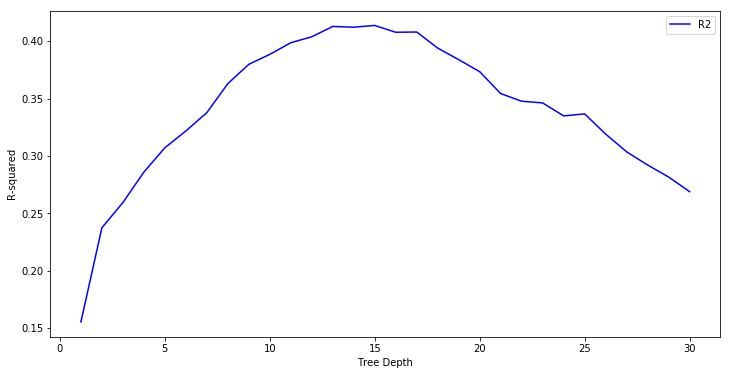

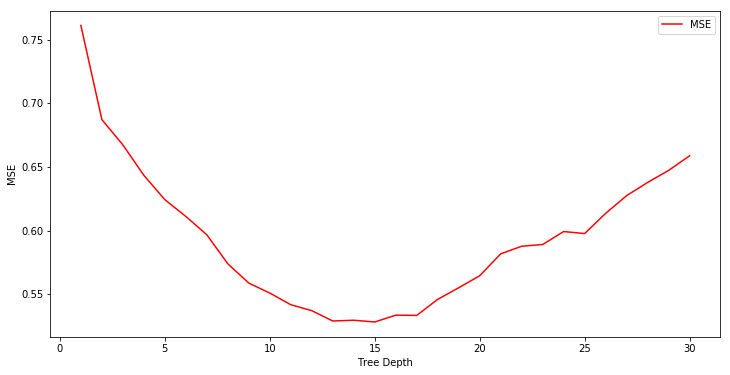

In [217]:
max_depths = np.linspace(1, 30, 30, endpoint=True)
mse_results = []
r2_results = []
for depth in max_depths:
    rg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    rg.fit(X_train_all, y_train)
    y_pred = rg.predict(X_test_all)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])
plt.figure(figsize=(12, 6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(max_depths, mse_results, 'r', label='MSE')
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.legend()
plt.show()

#### It looks like the best depth to use for the decision tree regressor is 15

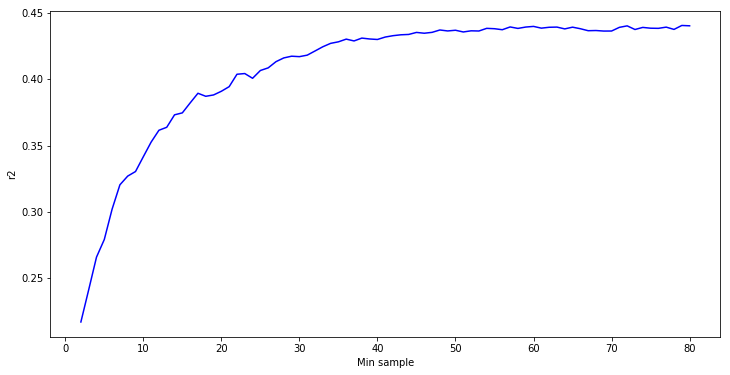

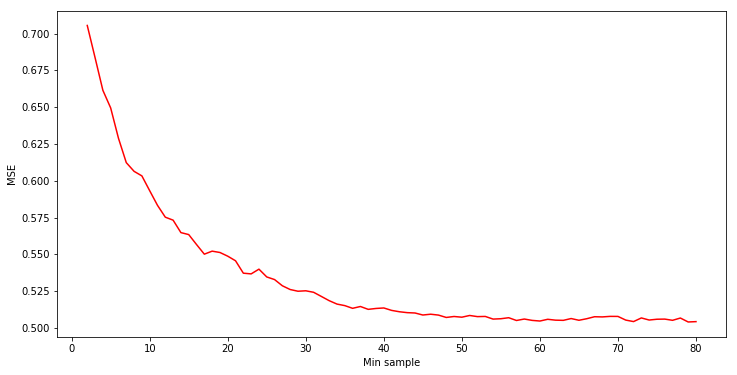

In [218]:
min_samples_splits = np.arange(2, 81)
mse_results = []
r2_results = []

for min_samples_split in min_samples_splits:
    regressor = DecisionTreeRegressor(min_samples_split=int(min_samples_split), random_state=42)
    regressor.fit(X_train_all, y_train)
    y_pred = regressor.predict(X_test_all)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.xlabel('Min sample')
plt.ylabel('r2')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, mse_results, 'r', label='MSE')
plt.xlabel('Min sample')
plt.ylabel('MSE')
plt.show()

#### It looks like the r2 and mse begin to taper off at around a minimum sample split of 50.

In [219]:
rt = DecisionTreeRegressor(max_depth=15, min_samples_split=50, random_state=SEED)
rt.fit(X_train_all, y_train)
y_pred = rt.predict(X_test_all)
performance(y_test, y_pred)

[0.43885383363573927, 0.5056599438635062]

#### This improved both our r2 score as well as our mse score.

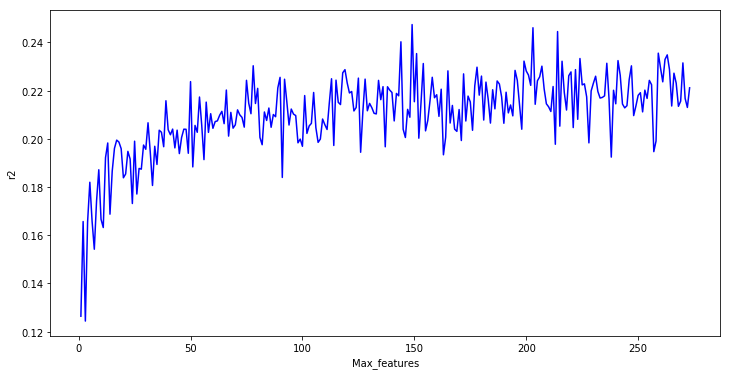

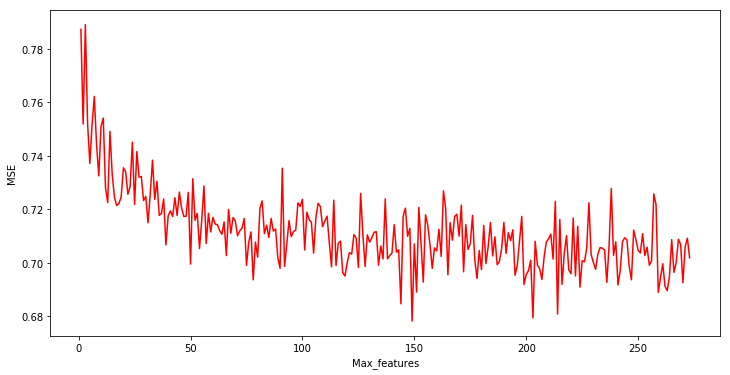

In [220]:
max_features = list(range(1, X_train_all.shape[1]))
mse_results = []
r2_results = []
for max_feature in max_features:
    regressor = DecisionTreeRegressor(max_features=max_feature, random_state=45)
    regressor.fit(X_train_all, y_train)
    y_pred = regressor.predict(X_test_all)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])
plt.figure(figsize=(12, 6))
plt.plot(max_features, r2_results, 'b', label='R2')
plt.xlabel('Max_features')
plt.ylabel('r2')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(max_features, mse_results, 'r', label='MSE')
plt.xlabel('Max_features')
plt.ylabel('MSE')
plt.show()

In [221]:
rt = DecisionTreeRegressor(max_depth=15, min_samples_split=50, max_features=150, random_state=SEED)
rt.fit(X_train_all, y_train)
y_pred = rt.predict(X_test_all)
performance(y_test, y_pred)

[0.43989936084263825, 0.5047177985537133]

#### This score and mse still isn't that great, I am going to see the best value for the min samples leaf parameter

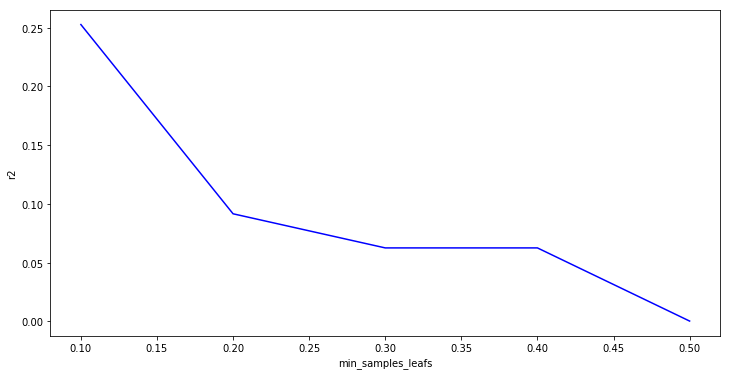

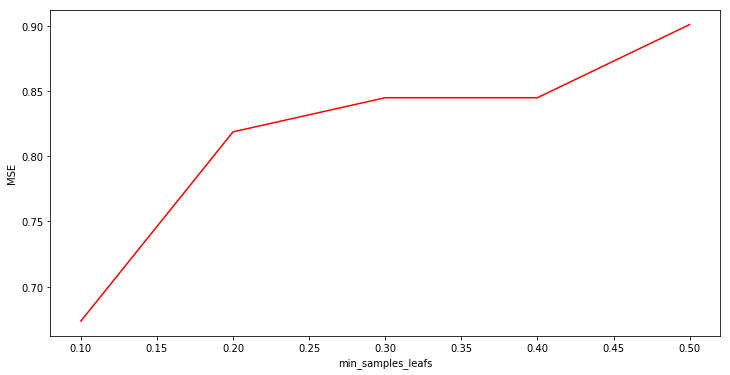

In [222]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
mse_results = []
r2_results = []
for min_samp_leaf in min_samples_leafs:
    regressor = DecisionTreeRegressor(min_samples_leaf=min_samp_leaf, random_state=42)
    regressor.fit(X_train_all, y_train)
    y_pred = regressor.predict(X_test_all)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])
plt.figure(figsize=(12, 6))
plt.plot(min_samples_leafs, r2_results, 'b', label='R2')
plt.xlabel('min_samples_leafs')
plt.ylabel('r2')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_samples_leafs, mse_results, 'r', label='MSE')
plt.xlabel('min_samples_leafs')
plt.ylabel('MSE')
plt.show()

In [223]:
rt = DecisionTreeRegressor(max_depth=15,
                           min_samples_split=50,
                           max_features=150,
                           min_samples_leaf=2,
                           random_state=SEED)
rt.fit(X_train_all, y_train)
y_pred = rt.predict(X_test_all)
performance(y_test, y_pred)

[0.4433625015573138, 0.5015970937456946]

#### Tuning these hyperparameters has improved our model's r2 score from .22 to .44 and has lowered the mse from .71 to .5 but it doesn't seem like it will get much better from here. I am going to try modeling with Dicision Tree Classifier

# Decision Tree Classifier

In [224]:
dt = DecisionTreeClassifier()
dt.fit(X_train_all, y_train)
y_hat_val = dt.predict(X_test_all)
print(f'Training Score: {dt.score(X_train_all, y_train)}')
print(f'Test      Score: {dt.score(X_test_all, y_test)}')

Training Score: 0.9955555555555555
Test      Score: 0.7565656565656566


In [225]:
print(f'Accuracy Score: {accuracy_score(y_test, y_hat_val)}')
print('-------------------')
print(f'Precision score: {precision_score(y_test, y_hat_val, average="macro")}')
print('-------------------')
print(f'Recall Score: {recall_score(y_test, y_hat_val, average="macro")}')
print('-------------------')
print(f'f1_score: {f1_score(y_test, y_hat_val, average="macro")}')

Accuracy Score: 0.7565656565656566
-------------------
Precision score: 0.6457787517336488
-------------------
Recall Score: 0.6483118289754043
-------------------
f1_score: 0.6470093889109677


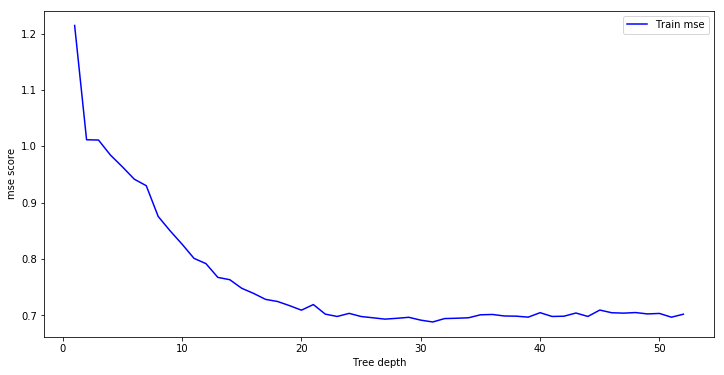

In [226]:
max_depths = np.linspace(1, 52, 52, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=SEED)
    dt.fit(X_train_all, y_train)
    pred = dt.predict(X_test_all)
    train_mse = mean_squared_error(y_test, pred)
    train_results.append(train_mse)
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train mse')
plt.ylabel('mse score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

In [227]:
drop_features = []
for fi, feature in zip(dt.feature_importances_, X_train_all.columns):
    if fi == 0.0:
        drop_features.append(feature)
        print(fi, feature)

0.0 region_code_16
0.0 region_code_24
0.0 region_code_40
0.0 region_code_99
0.0 district_code_62
0.0 district_code_63
0.0 district_code_67
0.0 district_code_80
0.0 lga_Arusha Urban
0.0 lga_Bahi
0.0 lga_Bukombe
0.0 lga_Chato
0.0 lga_Chunya
0.0 lga_Geita
0.0 lga_Igunga
0.0 lga_Kigoma Urban
0.0 lga_Lindi Urban
0.0 lga_Mafia
0.0 lga_Makete
0.0 lga_Mbarali
0.0 lga_Missungwi
0.0 lga_Mtwara Rural
0.0 lga_Mtwara Urban
0.0 lga_Mufindi
0.0 lga_Musoma Rural
0.0 lga_Nanyumbu
0.0 lga_Nyamagana
0.0 lga_Rorya
0.0 lga_Shinyanga Urban
0.0 lga_Sikonge
0.0 lga_Simanjiro
0.0 lga_Songea Urban
0.0 lga_Sumbawanga Rural
0.0 lga_Tabora Urban
0.0 lga_Tandahimba
0.0 lga_Temeke
0.0 lga_Tunduru
0.0 lga_Urambo
0.0 management_other - school
0.0 waterpoint_type_dam


In [228]:
X_train_all_copy = X_train_all.copy()

In [229]:
drop_features

['region_code_16',
 'region_code_24',
 'region_code_40',
 'region_code_99',
 'district_code_62',
 'district_code_63',
 'district_code_67',
 'district_code_80',
 'lga_Arusha Urban',
 'lga_Bahi',
 'lga_Bukombe',
 'lga_Chato',
 'lga_Chunya',
 'lga_Geita',
 'lga_Igunga',
 'lga_Kigoma Urban',
 'lga_Lindi Urban',
 'lga_Mafia',
 'lga_Makete',
 'lga_Mbarali',
 'lga_Missungwi',
 'lga_Mtwara Rural',
 'lga_Mtwara Urban',
 'lga_Mufindi',
 'lga_Musoma Rural',
 'lga_Nanyumbu',
 'lga_Nyamagana',
 'lga_Rorya',
 'lga_Shinyanga Urban',
 'lga_Sikonge',
 'lga_Simanjiro',
 'lga_Songea Urban',
 'lga_Sumbawanga Rural',
 'lga_Tabora Urban',
 'lga_Tandahimba',
 'lga_Temeke',
 'lga_Tunduru',
 'lga_Urambo',
 'management_other - school',
 'waterpoint_type_dam']

In [230]:
#X_train_all = X_train_all.drop(columns=drop_features, axis=0)

In [231]:
#X_test_all = X_test_all.drop(columns=drop_features, axis=0)

In [232]:
dt = DecisionTreeClassifier()
dt.fit(X_train_all, y_train)
y_hat_val = dt.predict(X_test_all)
print(f'Training Score: {dt.score(X_train_all, y_train)}')
print(f'Test      Score: {dt.score(X_test_all, y_test)}')

Training Score: 0.9955555555555555
Test      Score: 0.7572390572390573


In [233]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [234]:
dt = DecisionTreeClassifier()
dt.fit(X_train_a2, y_train)
y_hat_val = dt.predict(X_test_a2)

In [235]:
pred = y_hat_val

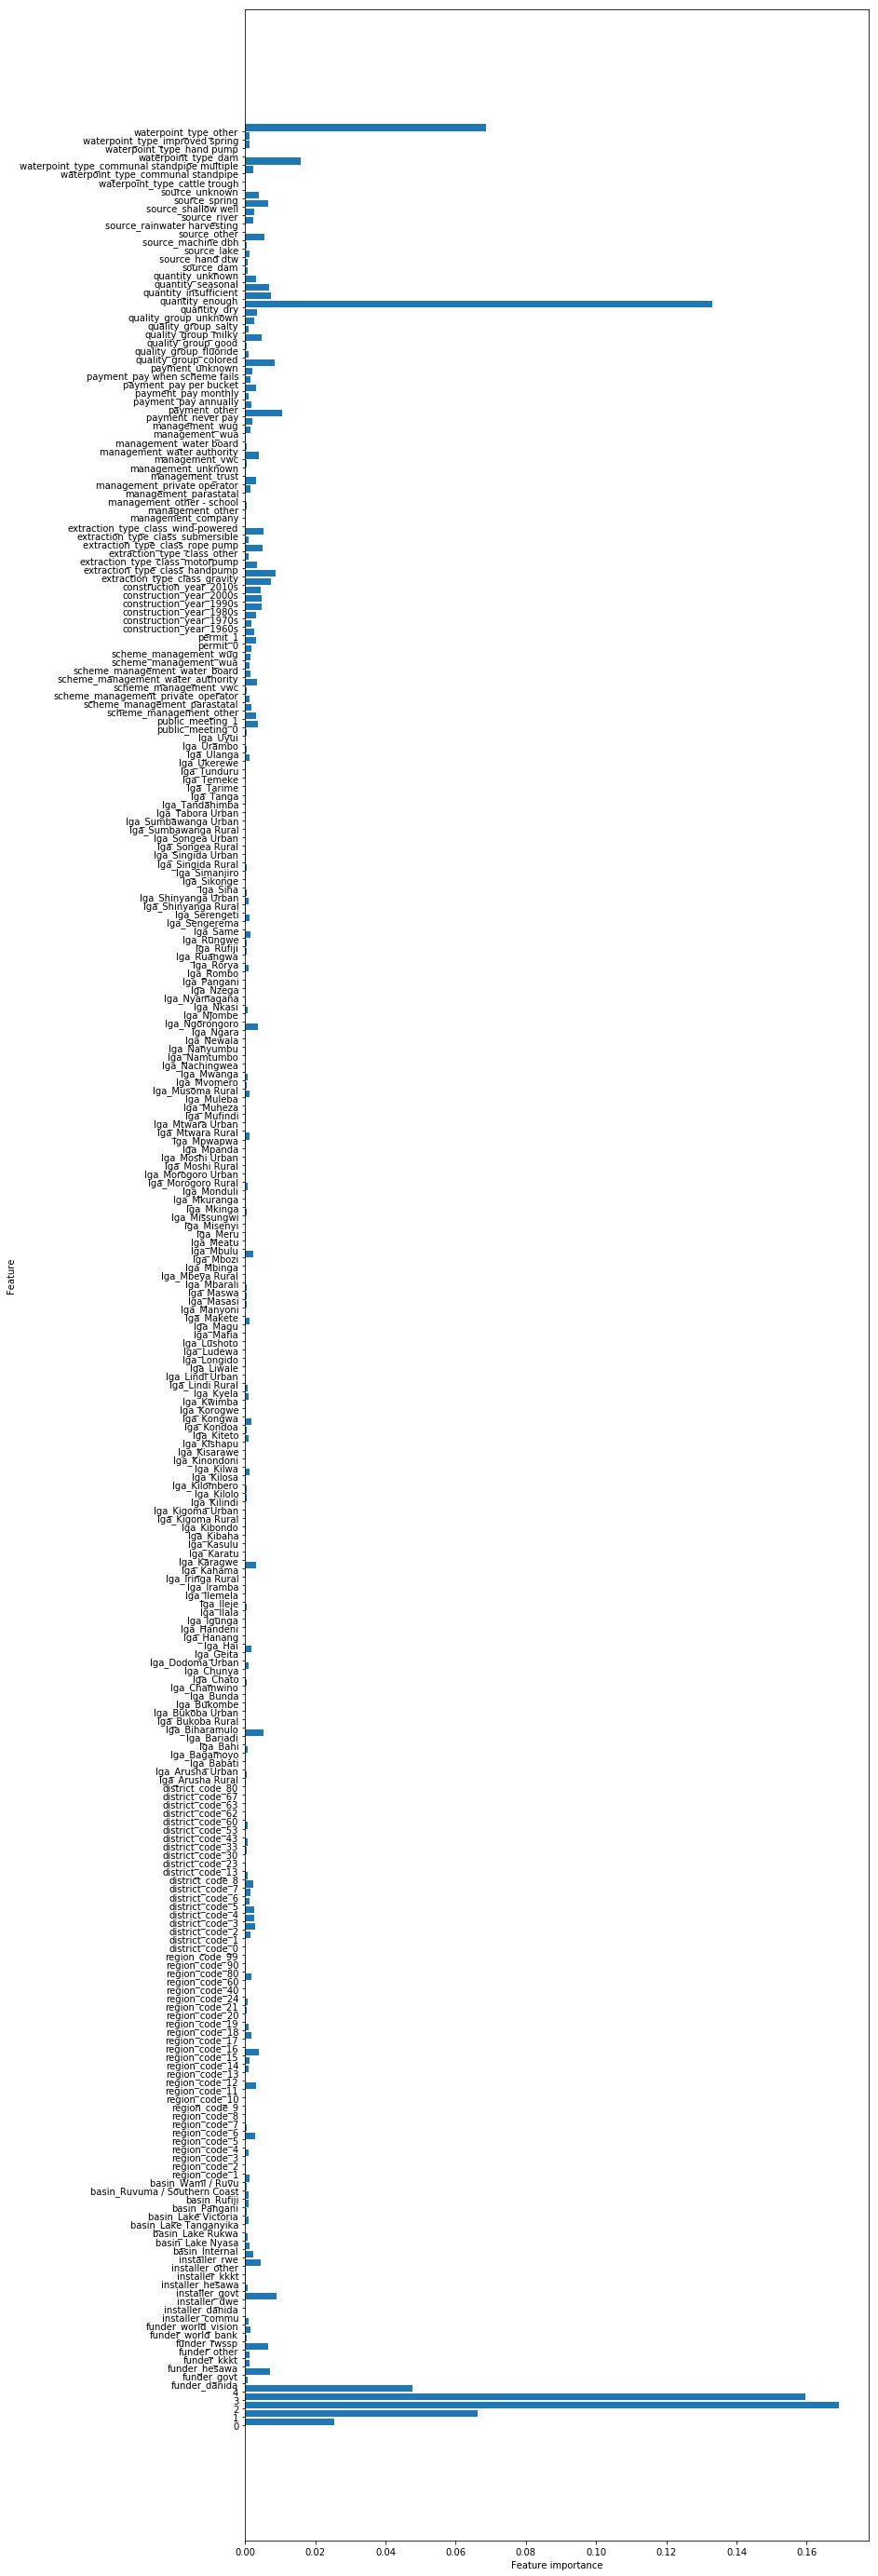

In [236]:
def plot_feature_importances(model):
    n_features = X_train_a2.shape[1]
    plt.figure(figsize=(12,50))
    plt.barh(range(n_features), model.feature_importances_, align='edge') 
    plt.yticks(np.arange(n_features), X_train_a2.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
plot_feature_importances(dt)

In [237]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4321  214 1143]
 [ 195  407  472]
 [1125  498 6475]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      5678
           1       0.36      0.38      0.37      1074
           2       0.80      0.80      0.80      8098

   micro avg       0.75      0.75      0.75     14850
   macro avg       0.64      0.65      0.64     14850
weighted avg       0.76      0.75      0.76     14850



# Bagging Decision Tree

In [238]:
from sklearn.ensemble import BaggingClassifier

In [239]:
bag = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=15), n_estimators=500, random_state=42)

In [240]:
bag.fit(X_train_a2, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=None, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [241]:
bag.score(X_test_a2, y_test)

0.7865319865319865

In [242]:
bag.score(X_train_a2, y_train)

0.8417508417508418

# Random Forest Classifier

In [243]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train_all, y_train)
rf.score(X_test_all, y_test)

0.8

In [244]:
rf.score(X_train_all, y_train)

0.9955555555555555

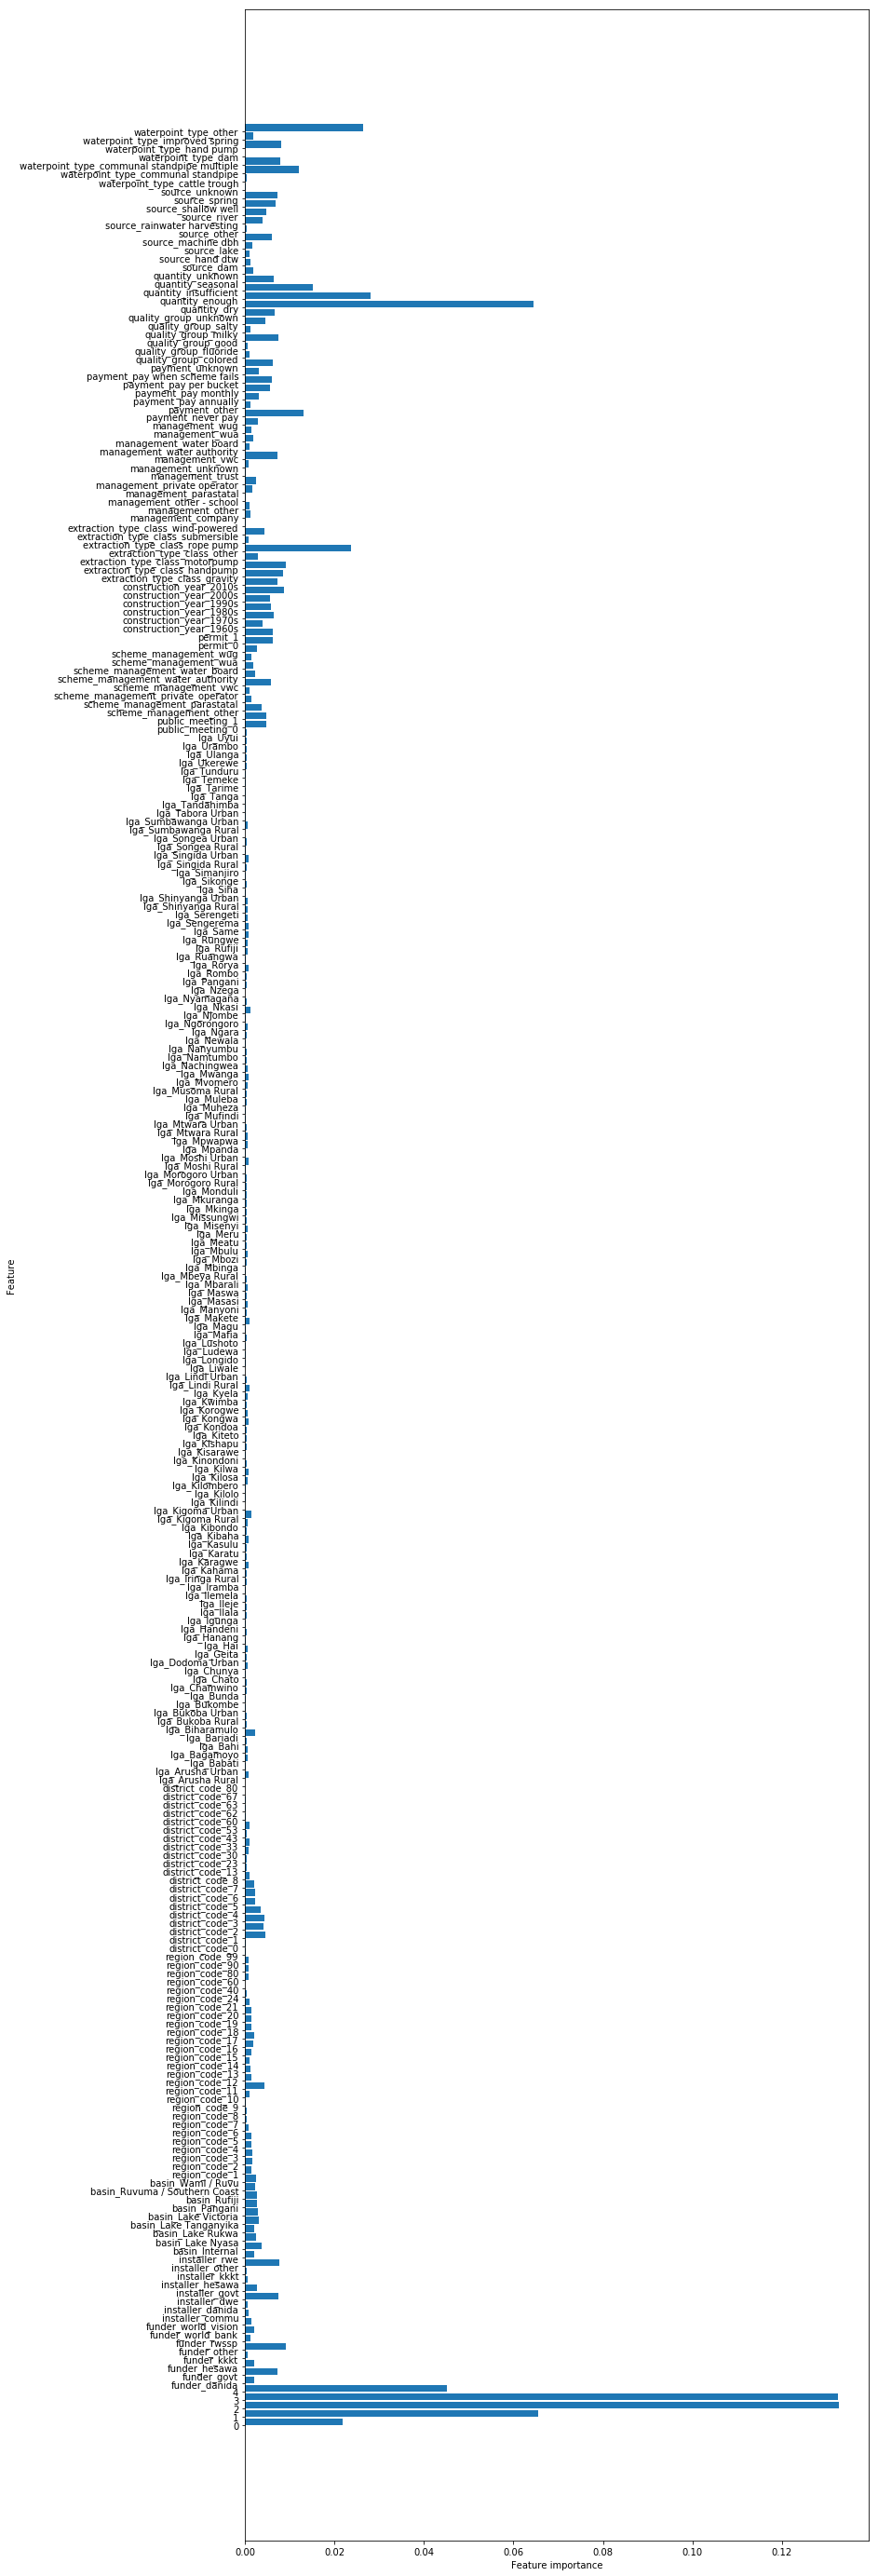

In [245]:
def plot_feature_importances(model):
    n_features = X_train_all.shape[1]
    plt.figure(figsize=(12,50))
    plt.barh(range(n_features), model.feature_importances_, align='edge') 
    plt.yticks(np.arange(n_features), X_train_all.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(rf)

# BorutaPy

#### I am going to try utilizing BorutaPy for feature selection. It is an all relevant feature selection method which will find all features holding necessary values for our prediction model. 

In [245]:
pip install Boruta

Note: you may need to restart the kernel to use updated packages.


In [247]:
from boruta import BorutaPy

#### I am going to leave in all of the features from before the original train test split.

In [287]:
ohe_features = ['funder', 'installer', 'basin', 
               'region_code', 'district_code', 'lga', 'public_meeting',
               'scheme_management', 'permit', 'construction_year', 
               'extraction_type_class', 'management',
               'payment', 'quality_group',
               'quantity', 'source', 'source_class', 'waterpoint_type']

In [313]:
cont_features = ['amount_tsh', 'gps_height', 
                 'num_private', 'public_meeting',
                  'population']

In [314]:
ohe = OneHotEncoder()
ss = StandardScaler()

In [315]:
train_cat = train[ohe_features]
train_cont = train[cont_features].astype(float)

In [327]:
train_ohe = ohe.fit_transform(train_cat)
train_scl = pd.DataFrame(ss.fit_transform(train_cont), columns=train[cont_features].columns)

In [328]:
columns = ohe.get_feature_names(input_features=train_cat.columns)
train_processed = pd.DataFrame(train_ohe.todense(), columns=columns)

In [331]:
train_all = pd.concat([train_scl, train_processed], axis=1)
train_all['status'] = train['status']

In [319]:
X = train_all.drop(columns=['status'], axis=1)

In [335]:
X_boruta = train_all.drop(columns=['status'], axis=1).values
y_boruta = train_all.status.values

In [393]:
rf = RandomForestClassifier(n_jobs=-1, n_estimators=500, oob_score=True, max_depth=6)
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)
feat_selector.fit_transform(X_boruta, y_boruta)
X_filtered = feat_selector.transform(X_boruta)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	277
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	277
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	277
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	277
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	277
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	277
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	277
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	110
Tentative: 	49
Rejected: 	118
Iteration: 	9 / 100
Confirmed: 	110
Tentative: 	49
Rejected: 	118
Iteration: 	10 / 100
Confirmed: 	110
Tentative: 	49
Rejected: 	118
Iteration: 	11 / 100
Confirmed: 	110
Tentative: 	49
Rejected: 	118
Iteration: 	12 / 100
Confirmed: 	112
Tentative: 	36
Rejected: 	129
Iteration: 	13 / 100
Confirmed: 	112
Tentative: 	36
Rejected: 	129
Iteration: 	14 / 100
Confirmed: 	112
Tentative: 	36
Rejected: 	129
Iteration: 	15 / 100
Confirmed: 	112
Tentative: 	36
Rejected: 	129
Iteration: 	16 / 100
Conf

#### After running boruta, we can see that it selected 122 features from the dataset. Let's see what they are.

In [392]:
for feat, sup in list(zip(boruta_features[0], list(feat_selector.support_))):
    if sup == True:
        print(feat, sup)
    

0 True
lga_Singida Rural True
public_meeting_1 True
scheme_management_other True
scheme_management_vwc True
scheme_management_water_authority True
scheme_management_wug True
permit_0 True
permit_1 True
construction_year_1970s True
scheme_management_wua True
lga_Rungwe True
lga_Chunya True
lga_Hai True
lga_Kahama True
lga_Karatu True
lga_Kasulu True
lga_Kigoma Rural True
lga_Kyela True
lga_Makete True
lga_Masasi True
waterpoint_type_improved spring True
lga_Moshi Rural True
lga_Nachingwea True
lga_Ngara True
extraction_type_class_gravity True
quantity_insufficient True
quantity_seasonal True
quantity_unknown True
source_lake True
source_rainwater harvesting True
source_river True
source_shallow well True
source_spring True
source_class_groundwater True
source_class_surface True
waterpoint_type_communal standpipe multiple True
lga_Bariadi True
quality_group_unknown True
extraction_type_class_motorpump True
extraction_type_class_other True
extraction_type_class_submersible True
management

In [361]:
boruta_features = pd.DataFrame(X.columns.tolist())
boruta_features['ranking'] = feat_selector.ranking_
boruta_features = boruta_features.sort_values('ranking', ascending=True).reset_index(drop=True)
rankings = []
for feat, rank in list(zip(boruta_features[0], boruta_features['ranking'])):
    print('"{}",'.format(feat, rank))
    


"0",
"lga_Singida Rural",
"public_meeting_0",
"public_meeting_1",
"scheme_management_other",
"scheme_management_vwc",
"scheme_management_water_authority",
"lga_Siha",
"scheme_management_water_board",
"scheme_management_wug",
"permit_0",
"permit_1",
"construction_year_1960s",
"construction_year_1970s",
"construction_year_1980s",
"scheme_management_wua",
"lga_Rungwe",
"lga_Rombo",
"lga_Pangani",
"lga_Chunya",
"lga_Hai",
"lga_Kahama",
"lga_Karatu",
"lga_Kasulu",
"lga_Kigoma Rural",
"lga_Kyela",
"lga_Makete",
"lga_Masasi",
"waterpoint_type_improved spring",
"lga_Moshi Rural",
"lga_Mpanda",
"lga_Nachingwea",
"lga_Ngara",
"lga_Njombe",
"construction_year_1990s",
"construction_year_2000s",
"construction_year_2010s",
"extraction_type_class_gravity",
"quantity_enough",
"quantity_insufficient",
"quantity_seasonal",
"quantity_unknown",
"source_lake",
"source_machine dbh",
"source_rainwater harvesting",
"source_river",
"source_shallow well",
"source_spring",
"source_class_groundwater",
"source_cla

In [339]:
boruta_features[50:100]

,0,ranking
50,waterpoint_type_communal standpipe,1
51,waterpoint_type_communal standpipe multiple,1
52,waterpoint_type_hand pump,1
53,quantity_dry,1
54,lga_Bariadi,1
55,quality_group_unknown,1
56,quality_group_good,1
57,extraction_type_class_handpump,1
58,extraction_type_class_motorpump,1
59,extraction_type_class_other,1


In [343]:
boruta_features[100:130]

,0,ranking
100,region_code_8,1
101,district_code_33,1
102,district_code_1,1
103,basin_Lake Rukwa,1
104,1,1
105,3,1
106,4,1
107,funder_danida,1
108,funder_govt,1
109,funder_other,1


In [355]:
boruta_features

,0,ranking
0,0,1
1,lga_Singida Rural,1
2,public_meeting_0,1
3,public_meeting_1,1
4,scheme_management_other,1
...,...,...
272,lga_Morogoro Urban,151
273,lga_Lindi Urban,152
274,region_code_40,154
275,lga_Nyamagana,154


In [380]:
new_boruta_feat = [
                str("0"),
                "lga_Singida Rural",
                "public_meeting_0",
                "public_meeting_1",
                "scheme_management_other",
                "scheme_management_vwc",
                "scheme_management_water_authority",
                "lga_Siha",
                "scheme_management_water_board",
                "scheme_management_wug",
                "permit_0",
                "permit_1",
                "construction_year_1960s",
                "construction_year_1970s",
                "construction_year_1980s",
                "scheme_management_wua",
                "lga_Rungwe",
                "lga_Rombo",
                "lga_Pangani",
                "lga_Chunya",
                "lga_Hai",
                "lga_Kahama",
                "lga_Karatu",
                "lga_Kasulu",
                "lga_Kigoma Rural",
                "lga_Kyela",
                "lga_Makete",
                "lga_Masasi",
                "waterpoint_type_improved spring",
                "lga_Moshi Rural",
                "lga_Mpanda",
                "lga_Nachingwea",
                "lga_Ngara",
                "lga_Njombe",
                "construction_year_1990s",
                "construction_year_2000s",
                "construction_year_2010s",
                "extraction_type_class_gravity",
                "quantity_enough",
                "quantity_insufficient",
                "quantity_seasonal",
                "quantity_unknown",
                "source_lake",
                "source_machine dbh",
                "source_rainwater harvesting",
                "source_river",
                "source_shallow well",
                "source_spring",
                "source_class_groundwater",
                "source_class_surface",
                "waterpoint_type_communal standpipe",
                "waterpoint_type_communal standpipe multiple",
                "waterpoint_type_hand pump",
                "quantity_dry",
                "lga_Bariadi",
                "quality_group_unknown",
                "quality_group_good",
                "extraction_type_class_handpump",
                "extraction_type_class_motorpump",
                "extraction_type_class_other",
                "extraction_type_class_submersible",
                "management_company",
                "management_private operator",
                "management_vwc",
                "management_water board",
                "management_wua",
                "management_wug",
                "payment_never pay",
                "payment_pay annually",
                "payment_pay monthly",
                "payment_pay per bucket",
                "payment_unknown",
                "quality_group_salty",
                "lga_Arusha Rural",
                "waterpoint_type_other",
                "region_code_2",
                "district_code_30",
                "basin_Lake Victoria",
                "basin_Pangani",
                "region_code_24",
                "basin_Rufiji",
                "basin_Ruvuma / Southern Coast",
                "district_code_4",
                "basin_Wami / Ruvu",
                "region_code_90",
                "district_code_2",
                "region_code_3",
                "basin_Lake Tanganyika",
                "region_code_80",
                "region_code_10",
                "region_code_11",
                "region_code_12",
                "region_code_13",
                "region_code_15",
                "region_code_16",
                "region_code_17",
                "district_code_7",
                "region_code_18",
                "region_code_19",
                "district_code_5",
                "region_code_8",
                "district_code_33",
                "district_code_1",
                "basin_Lake Rukwa",
                str("1"),
                str("3"),
                str("4"),
                "funder_danida",
                "funder_govt",
                "funder_other",
                "funder_rwssp",
                "funder_world_bank",
                "installer_commu",
                "installer_dwe",
                "district_code_53",
                "region_code_20",
                "basin_Lake Nyasa",
                "basin_Internal",
                "installer_govt",
                "district_code_3",
                "installer_rwe",
                "installer_other",
                "region_code_4"]

In [383]:
for col in train_all.columns:
    print(col)

amount_tsh
gps_height
num_private
public_meeting
population
funder_danida
funder_govt
funder_hesawa
funder_kkkt
funder_other
funder_rwssp
funder_world_bank
funder_world_vision
installer_commu
installer_danida
installer_dwe
installer_govt
installer_hesawa
installer_kkkt
installer_other
installer_rwe
basin_Internal
basin_Lake Nyasa
basin_Lake Rukwa
basin_Lake Tanganyika
basin_Lake Victoria
basin_Pangani
basin_Rufiji
basin_Ruvuma / Southern Coast
basin_Wami / Ruvu
region_code_1
region_code_2
region_code_3
region_code_4
region_code_5
region_code_6
region_code_7
region_code_8
region_code_9
region_code_10
region_code_11
region_code_12
region_code_13
region_code_14
region_code_15
region_code_16
region_code_17
region_code_18
region_code_19
region_code_20
region_code_21
region_code_24
region_code_40
region_code_60
region_code_80
region_code_90
region_code_99
district_code_0
district_code_1
district_code_2
district_code_3
district_code_4
district_code_5
district_code_6
district_code_7
district_c

In [367]:
X2_boruta = train_all[new_boruta_feat]
y2_boruta = train_all.status.values

KeyError: "['0', '4', '3', '1'] not in index"

In [ ]:
rf = RandomForestClassifier(n_jobs=-1, n_estimators=500, oob_score=True, max_depth=6)
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)
feat_selector.fit(X2_boruta, y2_boruta)